# Bike Sharing Demand 

## Descriptive Statistics

### Let's import the necessary packages


In [16]:
import pandas as pd
import pickle
import numpy as np
import re
from sklearn import linear_model


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split

### Now let's have a look at the data-set

In [21]:
Btrain = pd.read_csv(r'C:\Users\bisha\OneDrive\Pictures\train.csv', parse_dates=['datetime'])

Btest  = pd.read_csv(r'C:\Users\bisha\OneDrive\Pictures\test.csv', parse_dates=['datetime'])

Btrain.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
Btest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
Btrain.shape

(10886, 12)

In [13]:
print("The number of rows and columns in the dataset are", Btrain.shape, "respectively")

The number of rows and columns in the dataset are (10886, 12) respectively


In [15]:
print(Btrain.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


### Now, we'll remove the variables not in Test Table.

In [23]:
Btest.columns

print([i for i in Btrain.columns if i not in Btest.columns]) 

['casual', 'registered', 'count']


Hence, we have to drop these 2 columns as they won't be relevant in final prediction. 'Count' is not dropped as it's only present in test dataset.

In [25]:
Btrain = Btrain.drop(['casual','registered'], axis=1)
Btrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [27]:
Btrain['hr'] = Btrain['datetime'].dt.hour

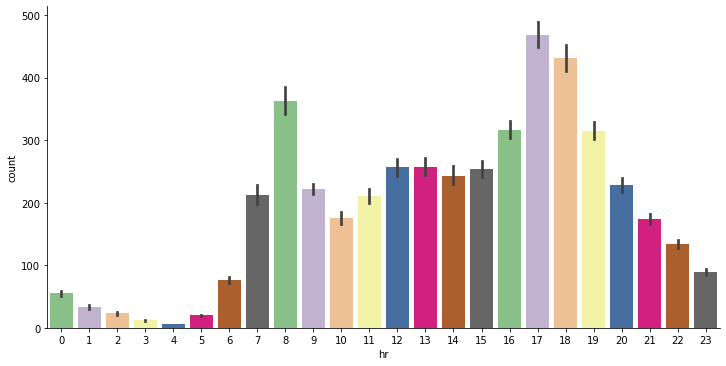

In [46]:
sns.catplot(x="hr",y="count",data=Btrain, kind='bar', palette = 'Accent', height=5 ,aspect=2)

In [47]:
Btrain['year'] = Btrain['datetime'].dt.year

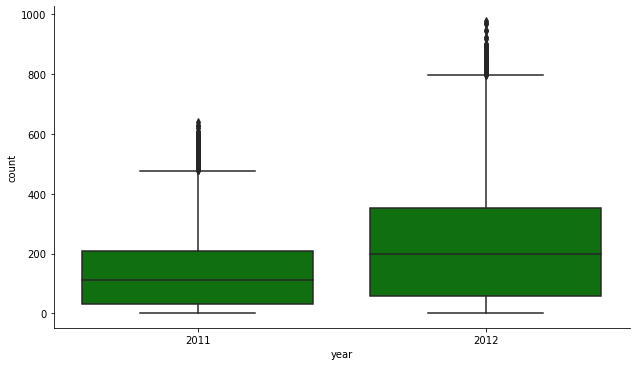

In [60]:
sns.catplot(x = "year", y="count", data=Btrain ,kind='box', color = 'Green', height = 5 ,aspect= 1.75)

### Building Correlation Matrix:

In [63]:
Btrain['year'] = Btrain['datetime'].dt.year
Btrain['month'] = Btrain['datetime'].dt.month
Btrain['day'] = Btrain['datetime'].dt.day
Btrain['hour'] = Btrain['datetime'].dt.hour

<AxesSubplot:>

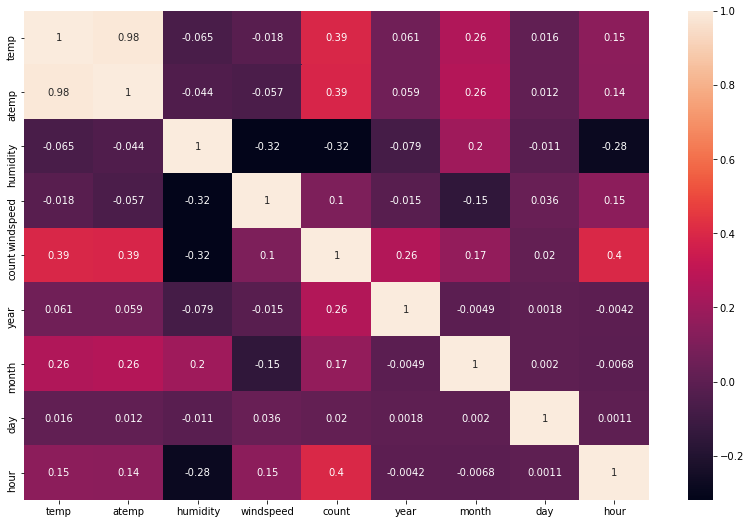

In [64]:
numeric = ["temp","atemp","humidity","windspeed","count","year","month","day","hour"]
plt.subplots(figsize=(14,9))
sns.heatmap(Btrain[numeric].corr(),annot=True)